In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
#1.What is the shape of the dataset?

In [7]:
df.shape

(8807, 12)

In [9]:
#2.What are the column names and their data types?

In [19]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [21]:
#3.How many missing values are there in each column?

In [27]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [29]:
#4.What are the unique values in the 'type' column?

In [37]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [71]:
#5.How many movies and TV shows are there?
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [57]:
#another solution
print(f'movies : {df[df['type']=='Movie'].shape[0]}')

movies : 6131


In [59]:
print(f'TV Shows: {df[df['type']=='TV Show'].shape[0]}')

TV Shows: 2676


In [61]:
#6.What is the earliest and latest release year?

In [65]:
df['release_year'].max()

2021

In [67]:
df['release_year'].min()

1925

In [73]:
#7.Which columns have the most missing values?

In [97]:
missing_values = df.isnull().sum()
sorted_missing_values = missing_values.sort_values(ascending = False)
top_column = sorted_missing_values.head(1)
top_column

director    2634
dtype: int64

In [99]:
#8.Are there any duplicate rows?

In [103]:
df.duplicated().sum()

0

In [105]:
#9.What is the distribution of content ratings?

In [107]:
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [109]:
#10.How many unique countries are represented?

In [110]:
countries = df['country'].str.split(',').explode().str.strip()
countries.nunique()

123

In [5]:
#11.Fill missing 'director' values with 'Unknown'.

In [13]:
df['director'].fillna('Unknown',inplace = True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [15]:
#12.Drop rows where 'title' is missing.

In [23]:
df.dropna(subset = 'title', inplace = True)

In [25]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [27]:
#13.Convert 'date_added' to datetime format.

In [7]:
df['date_added'] = pd.to_datetime(df['date_added'], errors = 'coerce')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [37]:
#14.Extract the year from 'date_added' into a new column.

In [9]:
df['year_added'] = df['date_added'].dt.year
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0


In [41]:
#15.Standardize the 'duration' column to separate numeric values and units.

In [53]:
df[['duration value','duration unit']] = df['duration'].str.split(' ', n=1, expand = True)
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,duration value,duration unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,90,min
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,2,Seasons


In [55]:
#16.Remove leading and trailing spaces in string columns.

In [61]:
df.applymap(lambda x: x.split() if isinstance(x, str) else x)
df.head(2)

C:\Users\mehed\AppData\Local\Temp\ipykernel_22160\2270216697.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(lambda x: x.split() if isinstance(x, str) else x)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,duration value,duration unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,90,min
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,2,Seasons


In [63]:
#17.Convert all column names to lowercase.

In [65]:
df.columns = df.columns.str.lower()
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,duration value,duration unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,90,min


In [67]:
#18.Replace missing 'country' values with the mode.

In [75]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [77]:
#19.Identify and handle inconsistent entries in the 'rating' column.

In [92]:
df['rating'] = pd.to_numeric(df['rating'], errors ='coerce')
df['rating'] = df['rating'].fillna(df['rating'].mean())

In [100]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,duration value,duration unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,NaN,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,90,min


In [98]:
#20.count each genres have how many movies

In [112]:
genre_column = df['listed_in'].str.split(',').explode().str.strip()
genre_column.nunique()

42

In [118]:
df_genres = df['listed_in'].str.split(',', expand = True)

In [6]:
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
#21.Which year had the most content added?

In [16]:
df['date_added'] = pd.to_datetime(df['date_added'], errors = 'coerce')

In [60]:
year = df['date_added'].dt.year
year.value_counts().head(1)
#most_common_year = year.mode()[0]
#count = (year == most_common_year).sum()
#print(f"{most_common_year} : {count}")

date_added
2019.0    1999
Name: count, dtype: int64

In [36]:
#22.What is the most common genre?

In [58]:
genre = df['listed_in'].str.split(',').explode().str.strip()
genre.value_counts().head(1)

listed_in
International Movies    2752
Name: count, dtype: int64

In [62]:
#23.Which country produces the most content on Netflix?

In [72]:
country = df['country'].str.split(',').explode().str.strip()
country.value_counts().head(1)

country
United States    3690
Name: count, dtype: int64

In [74]:
#24.Who are the top 10 directors with the most titles?

In [82]:
director = df['director'].str.split(',').explode().str.strip()
director.value_counts().head(10)

director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Youssef Chahine        12
Martin Scorsese        12
Name: count, dtype: int64

In [84]:
#25.Who are the top 10 actors appearing in the most titles?

In [86]:
actor = df['cast'].str.split(',').explode().str.strip()
actor.value_counts().head(10)

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: count, dtype: int64

In [88]:
#26.What is the average duration of movies?

In [108]:
movies = df[df['type'] == 'Movie'].copy()
movies_duration = movies['duration'].str.replace('min','').str.strip().astype(float)
average_duration = movies_duration.mean()
average_duration

99.57718668407311

In [98]:
#27.How many TV shows have more than 3 seasons?

In [106]:
tv_shows = df[df['type']=='TV Show'].copy()
duration = tv_shows['duration'].str.replace('Season','',regex = False).str.replace('s','',regex= False).str.strip().astype(float)
count = (duration > 3).sum()
count

259

In [118]:
#28.What is the distribution of content types over the years?

In [116]:
df['year_added'] = df['date_added'].dt.year
distribution = df.groupby(['year_added','type']).size().unstack(fill_value =0)
distribution

type,Movie,TV Show
year_added,,
2008.0,1,1
2009.0,2,0
2010.0,1,0
2011.0,13,0
2012.0,3,0
2013.0,6,4
2014.0,19,4
2015.0,56,17
2016.0,253,165


In [128]:
#29.Which genres are most popular in the US?

In [126]:
us_content = df[df['country'].str.contains('United States',na = False)].copy()
us_content_genre = us_content['listed_in'].str.split(',').explode().str.strip()
us_content_genre.value_counts()

listed_in
Dramas                          835
Comedies                        680
Documentaries                   512
Action & Adventure              404
Independent Movies              390
Children & Family Movies        390
Thrillers                       292
TV Comedies                     258
TV Dramas                       232
Romantic Movies                 225
Stand-Up Comedy                 216
Kids' TV                        214
Horror Movies                   201
Docuseries                      192
Sci-Fi & Fantasy                181
International Movies            166
Music & Musicals                147
Crime TV Shows                  145
Reality TV                      123
Sports Movies                   113
TV Action & Adventure            94
Classic Movies                   81
International TV Shows           74
LGBTQ Movies                     63
TV Sci-Fi & Fantasy              60
Cult Movies                      52
TV Mysteries                     51
Science & Nature T

In [130]:
#30.How many titles were added each month?
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0


In [132]:
df['month_added'] = df['date_added'].dt.to_period('M')
title_count = df.groupby('month_added').size()
title_count

month_added
2008-01      1
2008-02      1
2009-05      1
2009-11      1
2010-11      1
          ... 
2021-05    132
2021-06    207
2021-07    257
2021-08    178
2021-09    183
Freq: M, Length: 108, dtype: int64

In [13]:
#31.Find the correlation between release year and addition year.
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0


In [33]:
clean_columns = df.dropna(subset =['release_year','year_added']).copy()
clean_columns['year_added'] = clean_columns['year_added'].astype(int)
clean_columns['release_year'] = clean_columns['release_year'].astype(int)
correlation = clean_columns['year_added'].corr(clean_columns['release_year'])
correlation

0.11047340174359696

In [35]:
#32.Identify trends in genre popularity over time.

In [51]:
# Step 1: Drop missing values
df_clean = df.dropna(subset=['listed_in', 'year_added']).copy()

# Step 2: Split and explode genres within df_clean
df_clean = df_clean.assign(genres=df_clean['listed_in'].str.split(',')).explode('genres')
df_clean['genres'] = df_clean['genres'].str.strip()

# Step 3: Group and unstack safely
count = df_clean.groupby(['year_added', 'genres']).size().unstack(fill_value=0)

count


genres,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
year_added,,,,,,,,,,,,,,,,,,,,,
2008.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2009.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010.0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2011.0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2012.0,0,0,0,0,1,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2013.0,0,0,0,0,2,0,0,1,2,0,...,0,0,3,0,1,1,0,1,0,0
2014.0,1,0,0,0,4,0,0,2,1,0,...,0,2,3,0,0,0,0,1,0,0
2015.0,2,0,0,6,11,0,0,12,1,0,...,0,5,3,1,1,1,0,1,0,2
2016.0,18,4,14,18,20,1,2,48,23,1,...,5,36,39,3,3,3,2,5,3,14


In [53]:
#33.Determine the average time between release and addition to Netflix.

In [65]:
df_clean = df.dropna(subset =['release_year','year_added']).copy()
df_clean['year_added'] = df_clean['year_added'].astype(int)
df_clean['time_diff'] = df_clean['year_added']-df_clean['release_year']
df_clean= df_clean[df_clean['time_diff'] >= 0]
average_time = df_clean['time_diff'].mean()
average_time

4.7004025301897645

In [93]:
#34.Analyze the distribution of content ratings by genre.

In [147]:
valid_ratings = [
    'TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y',
    'PG', 'TV-G', 'NR', 'G', 'TV-Y7-FV', 'NC-17', 'UR'
]
df_clean = df.dropna(subset =['listed_in','rating']).copy()
df_clean = df_clean[df_clean['rating'].isin(valid_ratings)]

df_clean = df_clean.assign(genres = df_clean['listed_in'].str.split(',')).explode('genres')
df_clean['genres'] = df_clean['genres'].str.strip()

count = df_clean.groupby(['genres','rating']).size().unstack(fill_value =0)
count

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
genres,,,,,,,,,,,,,,
Action & Adventure,1,0,9,32,148,220,213,0,201,33,0,0,1,1
Anime Features,0,0,0,5,4,0,23,1,15,19,0,4,0,0
Anime Series,0,0,0,0,0,0,71,0,59,17,2,26,0,0
British TV Shows,0,0,2,0,0,0,46,17,108,55,20,5,0,0
Children & Family Movies,33,0,0,195,11,0,18,51,1,85,113,129,5,0
Classic & Cult TV,0,0,0,0,0,0,10,1,9,6,1,1,0,0
Classic Movies,8,0,3,17,10,32,23,1,11,11,0,0,0,0
Comedies,11,2,14,148,168,180,465,29,431,153,21,47,4,1
Crime TV Shows,0,0,1,0,0,0,111,1,350,4,0,3,0,0


In [109]:
#35.Compare the number of movies and TV shows added each year.

In [107]:
df_clean = df.dropna(subset =['year_added']).copy()
df_clean['year_added'] = df_clean['year_added'].astype(int)

count = df_clean.groupby(['year_added','type']).size().unstack(fill_value =0)
count

type,Movie,TV Show
year_added,,
2008,1,1
2009,2,0
2010,1,0
2011,13,0
2012,3,0
2013,6,4
2014,19,4
2015,56,17
2016,253,165


In [129]:
#36.Identify any seasonal trends in content addition.

In [127]:
df_clean = df.dropna(subset=['date_added']).copy()
df_clean['date_added'] = pd.to_datetime(df_clean['date_added'],format='mixed')
df_clean['month_added'] = df_clean['date_added'].dt.month_name()
df_clean['month_added'].value_counts()

month_added
July         827
December     813
September    770
April        764
October      760
August       755
March        742
January      738
June         728
November     705
May          632
February     563
Name: count, dtype: int64

In [157]:
#37.Analyze the diversity of content by country over time.

In [153]:
df_clean = df.dropna(subset = ['country','date_added']).copy()
df_clean['date_added'] = pd.to_datetime(df_clean['date_added'],format='mixed')
df_clean['year_added'] = df_clean['date_added'].dt.year.astype(int)
df_clean = df_clean.assign(countries = df_clean['country'].str.split(',')).explode('countries')
df_clean['countries'] = df_clean['countries'].str.strip()

count = df_clean.groupby(['year_added','countries']).size().unstack(fill_value = 0)

countries,,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,...,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Vatican City,Venezuela,Vietnam,West Germany,Zimbabwe
year_added,,,,,,,,,,,,,,,,,,,,,
2008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
2009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2011,0,0,0,0,0,0,0,0,0,0,...,0,0,1,12,0,0,0,0,0,0
2012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0
2013,0,0,0,0,0,0,0,0,0,0,...,0,0,1,10,0,0,0,0,0,0
2014,1,0,0,0,0,0,0,0,0,0,...,0,0,3,22,0,0,0,0,0,0
2015,0,0,0,0,0,0,0,5,0,0,...,1,0,8,57,0,0,0,0,0,0
2016,0,0,0,0,0,3,0,8,1,1,...,0,1,54,203,0,0,0,0,0,1


In [181]:
#38.Determine the proportion of international content.

In [5]:
home_country = 'Bangladesh'

df_clean = df.dropna(subset = ['country']).copy()

df_clean['countries'] = df_clean['country'].str.split(',')
df_clean = df_clean.explode('countries')
df_clean['countries'] = df_clean['countries'].str.strip()

total_content = len(df_clean)
int_content = len(df_clean[df_clean['countries']!=home_country])
proportion = int_content/total_content
proportion

0.9996007585587384

In [25]:
#39.create a bar chart of the top 10 genres.
import matplotlib.pyplot as plt

In [31]:
df_genre = df['listed_in'].str.split(',').explode().str.strip()
top_genres = df_genre.value_counts().head(10)
x_genres = top_genres.index
y_counts = top_genres.values

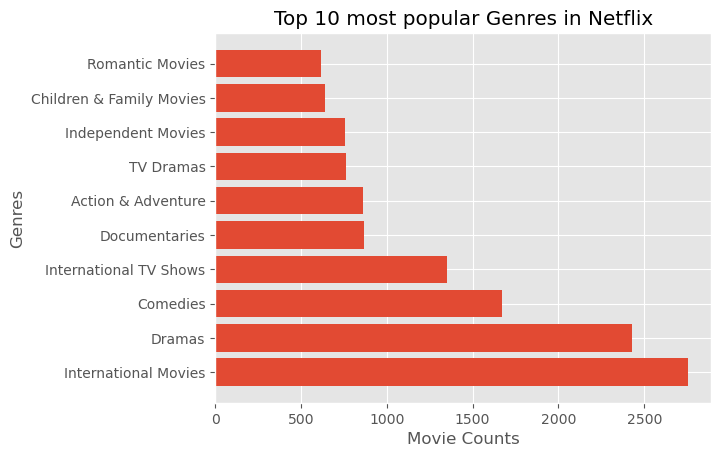

In [37]:
plt.style.use('ggplot')

plt.barh(x_genres,y_counts)

plt.title('Top 10 most popular Genres in Netflix')
plt.xlabel('Movie Counts')
plt.ylabel('Genres')

plt.show()

In [79]:
#40.Plot the number of titles added each year.

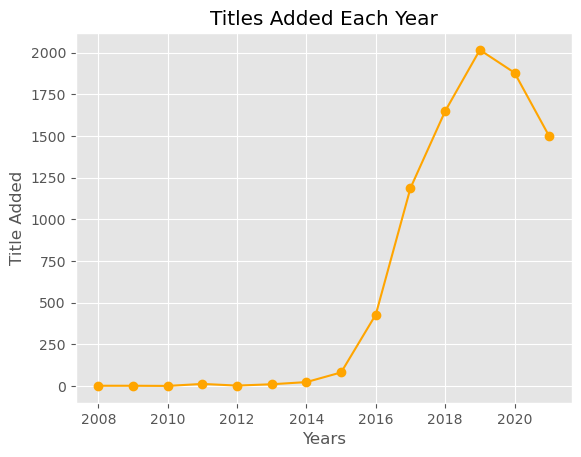

In [77]:
df_clean = df.dropna(subset=['date_added']).copy()
df_clean['date_added'] = pd.to_datetime(df_clean['date_added'],format='mixed')
df_clean['year_added'] = df_clean['date_added'].dt.year
years = df_clean['year_added'].value_counts().sort_index(ascending=False)
x_years = years.index
y_years = years.values

plt.style.use('ggplot')

plt.plot(x_years,y_years,color='#FFA500',marker='o')

plt.title('Titles Added Each Year')
plt.xlabel('Years')
plt.ylabel('Title Added')

plt.show()

In [111]:
#41.Generate a heatmap of missing values.

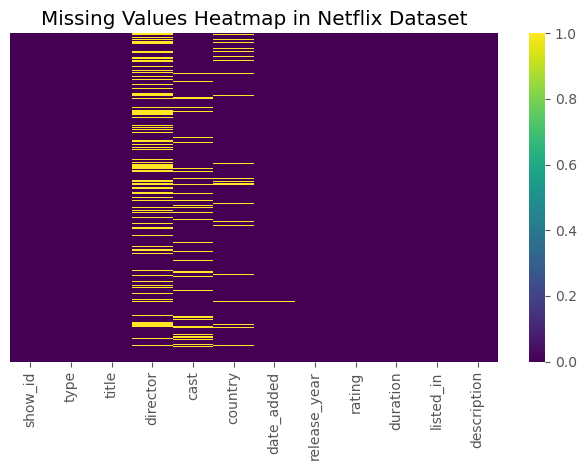

In [113]:
import seaborn as sns

sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False)

# Title
plt.title('Missing Values Heatmap in Netflix Dataset')
plt.tight_layout()
plt.show()

In [141]:
#42.Visualize the distribution of content ratings.

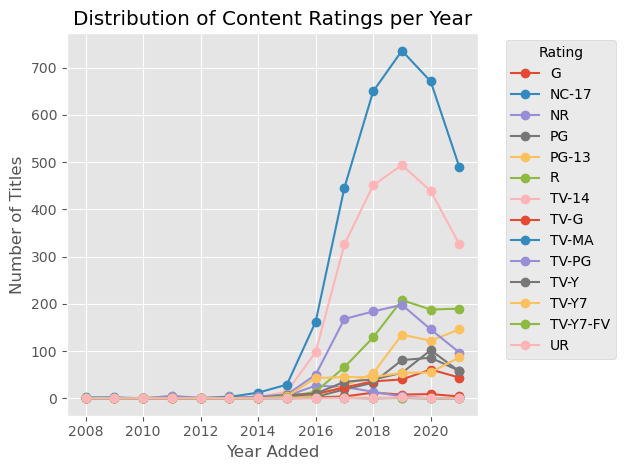

In [191]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter valid ratings and drop missing dates
valid_ratings = [
    'TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y',
    'PG', 'TV-G', 'NR', 'G', 'TV-Y7-FV', 'NC-17', 'UR'
]

df_clean = df.dropna(subset=['rating', 'date_added']).copy()
df_clean['date_added'] = pd.to_datetime(df_clean['date_added'], format='mixed', errors='coerce')
df_clean['year_added'] = df_clean['date_added'].dt.year
df_clean = df_clean[df_clean['rating'].isin(valid_ratings)]

# Step 2: Group by year and rating
rating_yearly = df_clean.groupby(['year_added', 'rating']).size().unstack(fill_value=0)

# Step 3: Plot
plt.style.use('ggplot')

for rating in rating_yearly.columns:
    plt.plot(rating_yearly.index, rating_yearly[rating], marker='o', label=rating)

plt.title('Distribution of Content Ratings per Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [157]:
#43.Create a pie chart of content types.

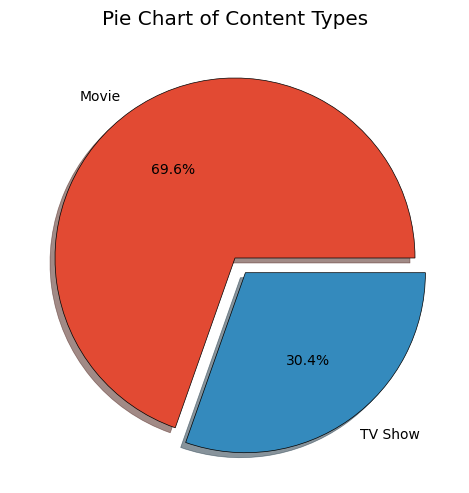

In [155]:
type_name = df['type'].value_counts().index
type_count = df['type'].value_counts().values
explode=[0,0.1]

plt.style.use('ggplot')

plt.pie(type_count,labels=type_name,wedgeprops={'edgecolor':'black'},shadow = True,autopct='%1.1f%%',explode=explode)

plt.tight_layout()
plt.title('Pie Chart of Content Types')
plt.show()

In [189]:
#44.Plot a histogram of movie durations.

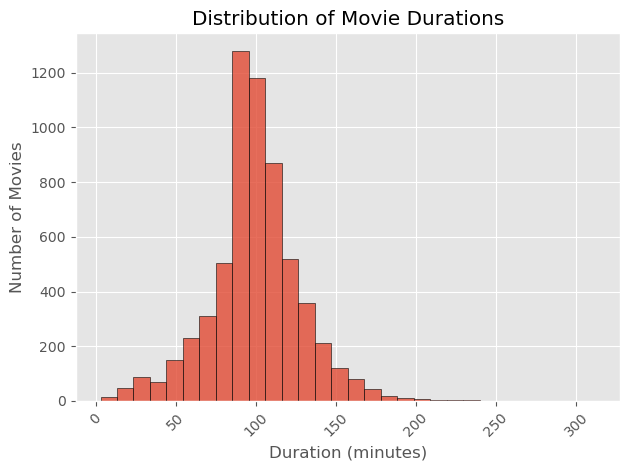

In [187]:
df_clean = df.dropna(subset=['duration']).copy()
df_clean = df_clean[df_clean['duration'].str.contains('min')]
df_clean['duration'] = df_clean['duration'].str.replace('min','').str.strip().astype(int)

plt.style.use('ggplot')

plt.hist(df_clean['duration'],bins=30,edgecolor='black',alpha=0.8)

plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()